# Logistic Regression Model 

In [1]:
#importingg the necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the DATASETS
churn= pd.read_csv("churn_data.csv")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer=pd.read_csv("customer_data.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet=pd.read_csv("internet_data.csv")
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Merging all the files 

In [5]:
#using merge
df1= pd.merge(churn, customer, how= "inner", on= "customerID")

In [6]:
telecom= pd.merge(df1, internet, "inner", "customerID")

In [7]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


### Inspecting the dataset

In [8]:
telecom.shape

(7043, 21)

In [9]:
print(customer.shape);
print(internet.shape);
print(churn.shape);

(7043, 5)
(7043, 9)
(7043, 9)


In [10]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
telecom["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [14]:
telecom["PhoneService"]= telecom["PhoneService"].replace({"Yes":1, "No": 0})

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [16]:
telecom["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [17]:
telecom["PaperlessBilling"]= telecom["PaperlessBilling"].replace({"Yes": 1 , "No": 0})

In [18]:
telecom.PaperlessBilling.value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [20]:
telecom["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
telecom["Churn"]= telecom["Churn"].replace({"Yes": 1 , "No": 0})

In [22]:
telecom.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [23]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [25]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [26]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [27]:
telecom.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [28]:
telecom.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [29]:
#Creating dummy variables
dummy1= pd.get_dummies(telecom[["Contract", "PaymentMethod", "gender", "InternetService"]], drop_first= True)

In [30]:
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0


In [31]:
telecom= pd.concat([telecom,dummy1], axis=1)

In [32]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [33]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [34]:
telecom.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [35]:
telecom["Partner"]= telecom["Partner"].replace({"Yes":1, "No":0})

In [36]:
telecom.Partner.value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [37]:
telecom["Dependents"]= telecom["Dependents"].replace({"Yes":1, "No": 0})

In [38]:
telecom.Dependents.value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

In [39]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [40]:
#creating fummies for "MultipleLines"
ml= pd.get_dummies(telecom["MultipleLines"], drop_first= "True")

In [41]:
ml.head()

,No phone service,Yes
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0


In [42]:
telecom.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [43]:
telecom.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [44]:
varlist= ["InternetService", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]
dm1= pd.get_dummies(telecom[varlist], drop_first= True)

In [45]:
dm1.head()

,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
telecom= pd.concat([telecom, dm1],  axis= 1)

In [47]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,0,0,0,0,0,0,0


In [48]:
varlist= ["InternetService", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

In [49]:
telecom.drop(varlist, axis=1 , inplace = True)

In [50]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,0,0,0,0,0,0,0


In [51]:
telecom["TotalCharges"].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [52]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [53]:
telecom[telecom["TotalCharges"]== " "].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [54]:
telecom.drop(index= telecom[telecom["TotalCharges"]== " "].index, inplace= True)

In [55]:
telecom["TotalCharges"]= telecom["TotalCharges"].astype(float)

In [56]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   Contract                               7032 non-null   object 
 4   PaperlessBilling                       7032 non-null   int64  
 5   PaymentMethod                          7032 non-null   object 
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   gender                                 7032 non-null   object 
 10  SeniorCitizen                          7032 non-null   int64  
 11  Part

In [57]:
telecom.drop("gender", axis=1, inplace= True)

telecom["TotalCharges"].convert_objects(convert_numeric= True)

### Checking for Outliers 

In [58]:
telecom.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.162400,0.482509,0.298493,0.209329,...,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.096701,0.421928
std,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.368844,0.499729,0.457629,0.406858,...,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.295571,0.493902
min,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
Contract                                 0
PaperlessBilling                         0
PaymentMethod                            0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecur

In [60]:
telecom.drop(["Contract", "PaymentMethod"], axis= 1, inplace= True)

## Feature Scaling 

In [61]:
X= telecom.drop(["Churn", "customerID"], axis= 1)

In [62]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   PaperlessBilling                       7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   SeniorCitizen                          7032 non-null   int64  
 6   Partner                                7032 non-null   int64  
 7   Dependents                             7032 non-null   int64  
 8   Contract_One year                      7032 non-null   uint8  
 9   Contract_Two year                      7032 non-null   uint8  
 10  PaymentMethod_Credit card (automatic)  7032 non-null   uint8  
 11  Paym

In [64]:
y=telecom["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [65]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
num_vars= ["tenure", "MonthlyCharges", "TotalCharges" ]
scaler= MinMaxScaler()
X[num_vars]= scaler.fit_transform(X[num_vars])

In [67]:
X.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.442560,0.903299,0.592719,0.463166,0.261309,0.162400,0.482509,0.298493,0.209329,0.239619,...,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.096701,0.421928
std,0.345708,0.295571,0.491363,0.299363,0.261571,0.368844,0.499729,0.457629,0.406858,0.426881,...,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.295571,0.493902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,1.000000,0.000000,0.172512,0.044155,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.394366,1.000000,1.000000,0.518408,0.159090,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760563,1.000000,1.000000,0.712562,0.435719,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0.000000,0,1,0.115423,0.001275,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.464789,1,0,0.385075,0.215867,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.014085,1,1,0.354229,0.010310,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.619718,0,0,0.239303,0.210241,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0.014085,1,1,0.521891,0.015330,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size= 0.7, random_state= 100)

In [70]:
X_train.shape

(4922, 32)

In [71]:
X_test.shape

(2110, 32)

###  Building the model

<AxesSubplot:>

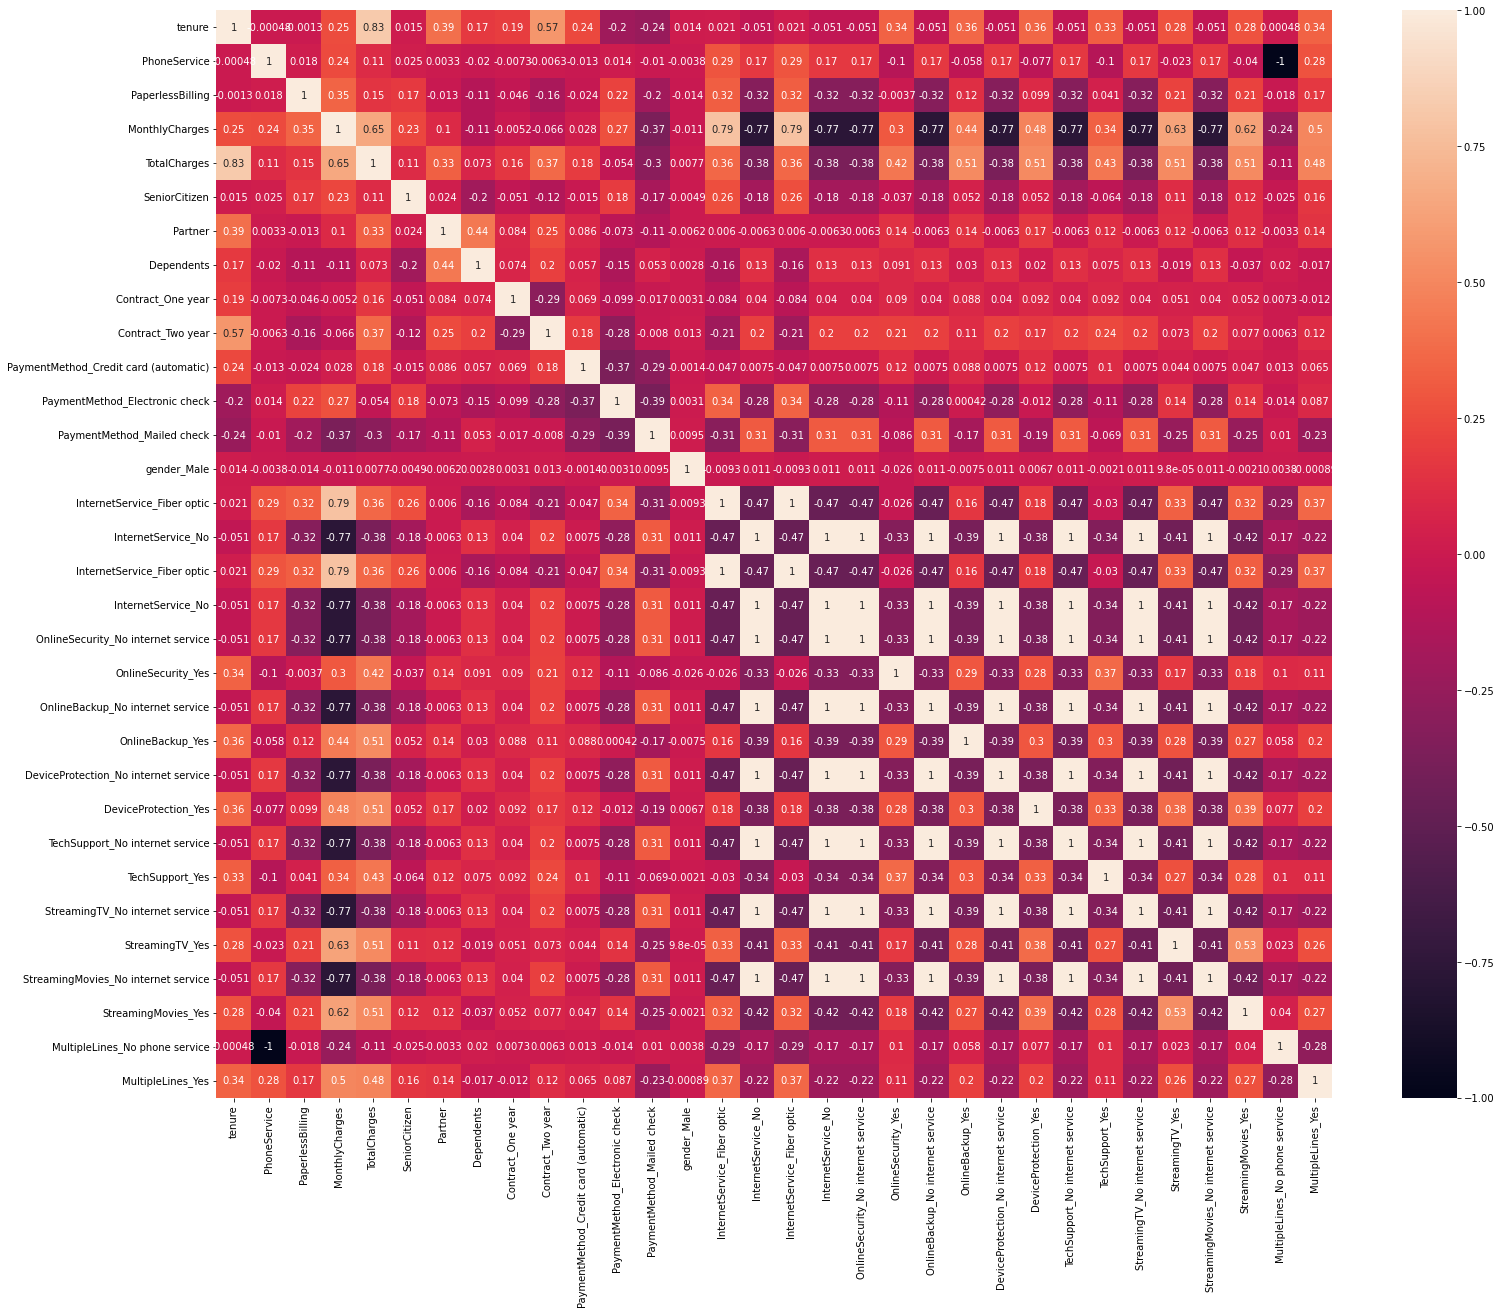

In [72]:
plt.rcParams["figure.figsize"]= [25,20]
sns.heatmap(X_train.corr(), annot= True)

#### dropping the highly correlated dummy variables

In [73]:
def correlation(dataset, threshold):
    col_corr =  set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]> threshold):
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return(col_corr)


In [74]:
correlation(X_train, 0.7)

{'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'TotalCharges'}

In [75]:
cols_to_drop= ['DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'TotalCharges']
X_train.drop(cols_to_drop, axis=1, inplace= True)

In [76]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,PaymentMethod_Mailed check,gender_Male,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
879,0.450704,1,1,0.362189,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5790,0.549296,0,1,0.324378,0,1,1,0,0,0,...,0,0,0,1,0,0,1,1,1,0
6498,0.000000,1,1,0.637313,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
880,0.126761,1,1,0.913930,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,0
2784,0.042254,1,1,0.794527,0,0,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0


<AxesSubplot:>

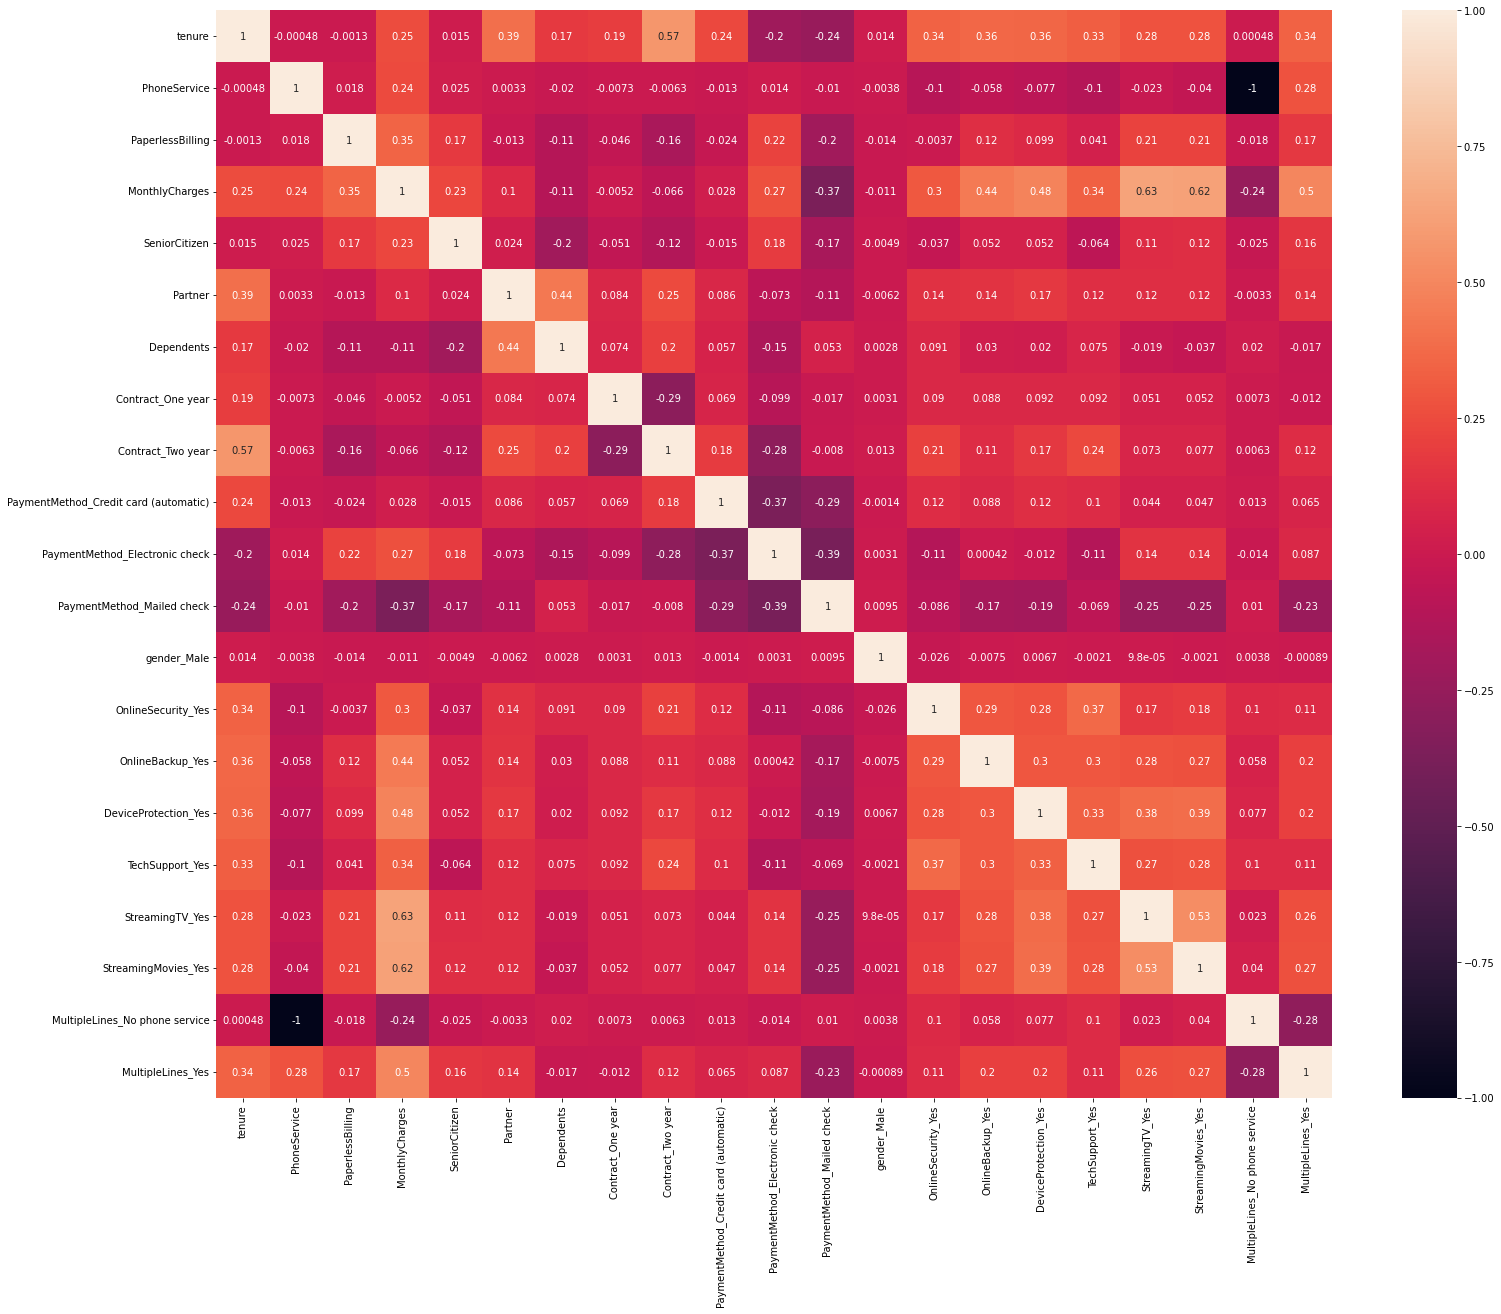

In [77]:
sns.heatmap(X_train.corr(), annot= True)

In [78]:
X_test.drop(cols_to_drop, axis=1 , inplace= True)

In [79]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,PaymentMethod_Mailed check,gender_Male,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
942,0.323944,1,1,0.612935,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3730,0.788732,1,1,0.858209,0,1,0,0,0,1,...,0,0,0,1,1,0,1,1,0,1
1761,0.802817,1,1,0.061692,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2283,0.000000,1,1,0.530348,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,0.563380,1,0,0.014428,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#building the model using statsmodel.api
X_train_sm= sm.add_constant(X_train)
logml= sm.GLM(y_train, X_train_sm,family= sm.families.Binomial())
log_ml= logml.fit()


In [81]:
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4901
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.3
Date:                Fri, 30 Sep 2022   Deviance:                       4030.6
Time:                        11:21:26   Pearson chi2:                 5.25e+03
No. Iterations:                    34                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6512      0.101     -6.463      0.000      -0.849      -0.454
tenure                                   -2.5683      0.205    -12.548      0.000      -2.969      -2.167
PhoneService                             -0.8761      0.090     -9.702      0.000      -1.053      -0.699
PaperlessBilling                          0.3247      0.090      3.620      0.000       0.149       0.501
MonthlyCharges                            3.5847      0.303     11.843      0.000       2.991       4.178
SeniorCitizen                             0.3999      0.102      3.924      0.000       0.200       0.600
Partner                                   0.0442      0.093      0.473      0.637      -0.139       0.227
Dependents                               -0.1643      0.107     -1.534      0.125      -0.374       0.046
Contract_One year                        -0.6714      0.128     -5.258      0.000      -0.922      -0.421
Contract_Two year                        -1.2244      0.209     -5.856      0.000      -1.634      -0.815
PaymentMethod_Credit card (automatic)    -0.2564      0.137     -1.876      0.061      -0.524       0.011
PaymentMethod_Electronic check            0.1746      0.113      1.550      0.121      -0.046       0.395
PaymentMethod_Mailed check               -0.2005      0.136     -1.478      0.139      -0.466       0.065
gender_Male                              -0.0331      0.078     -0.423      0.672      -0.187       0.120
OnlineSecurity_Yes                       -0.5072      0.103     -4.937      0.000      -0.709      -0.306
OnlineBackup_Yes                         -0.2969      0.094     -3.168      0.002      -0.481      -0.113
DeviceProtection_Yes                     -0.1675      0.097     -1.729      0.084      -0.357       0.022
TechSupport_Yes                          -0.5166      0.101     -5.099      0.000      -0.715      -0.318
StreamingTV_Yes                          -0.0353      0.104     -0.340      0.733      -0.238       0.168
StreamingMovies_Yes                      -0.1455      0.103     -1.409      0.159      -0.348       0.057
MultipleLines_No phone service            0.2249      0.102      2.196      0.028       0.024       0.426
MultipleLines_Yes                         0.0780      0.098      0.793      0.428      -0.115       0.271
=========================================================================================================
"""

In [82]:
#using sklearn to use rfe selection
log_reg= LogisticRegression()
rfe=  RFE(log_reg, 15)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False])

In [83]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 6),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 7),
 ('StreamingMovies_Yes', False, 3),
 ('MultipleLines_No phone service', True, 1),
 ('MultipleLines_Yes', False, 4)]

In [84]:
cols= X_train.columns[rfe.support_]
cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'MultipleLines_No phone service'],
      dtype='object')

In [85]:
X_train.shape

(4922, 21)

In [86]:
X_train_new= X_train[cols]
X_train_new.shape

(4922, 15)

## A brief summarization

In logistic regression we use Generalized Linear Model(GLM) method of library statmodels, binomial() in the family argument tells the statsmodels that it needs to fit a logit curve to a binomial data

In [87]:
#fitting the model again using statmodels and X_train_new
X_train_sm_new= sm.add_constant(X_train_new)
logml2= sm.GLM(y_train, X_train_sm_new, family=sm.families.Binomial())
log_model2= logml2.fit()

In [88]:
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.6
Date:                Fri, 30 Sep 2022   Deviance:                       4037.2
Time:                        11:21:27   Pearson chi2:                 5.26e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6547      0.096     -6.839      0.000      -0.842      -0.467
tenure                                   -2.5712      0.191    -13.482      0.000      -2.945      -2.197
PhoneService                             -0.8071      0.080    -10.053      0.000      -0.964      -0.650
PaperlessBilling                          0.3338      0.089      3.734      0.000       0.159       0.509
MonthlyCharges                            3.2909      0.214     15.395      0.000       2.872       3.710
SeniorCitizen                             0.4169      0.101      4.124      0.000       0.219       0.615
Dependents                               -0.1456      0.098     -1.484      0.138      -0.338       0.047
Contract_One year                        -0.7244      0.125     -5.779      0.000      -0.970      -0.479
Contract_Two year                        -1.2861      0.207     -6.216      0.000      -1.692      -0.881
PaymentMethod_Credit card (automatic)    -0.2596      0.136     -1.904      0.057      -0.527       0.008
PaymentMethod_Electronic check            0.1805      0.112      1.607      0.108      -0.040       0.401
PaymentMethod_Mailed check               -0.2129      0.135     -1.578      0.115      -0.477       0.052
OnlineSecurity_Yes                       -0.4861      0.101     -4.799      0.000      -0.685      -0.288
OnlineBackup_Yes                         -0.2793      0.093     -3.011      0.003      -0.461      -0.098
TechSupport_Yes                          -0.5322      0.101     -5.267      0.000      -0.730      -0.334
MultipleLines_No phone service            0.1524      0.097      1.577      0.115      -0.037       0.342
=========================================================================================================
"""

In [89]:
#predicting the values of y
y_train_pred= log_model2.predict(X_train_sm_new)

In [90]:
y_train_pred.head(20)

879     0.201926
5790    0.319133
6498    0.704845
880     0.607450
2784    0.668241
3874    0.400769
5387    0.363194
6623    0.798212
4465    0.319171
5364    0.591235
3022    0.160393
1251    0.580254
3494    0.653363
266     0.013325
2772    0.006592
242     0.053350
738     0.383555
4066    0.026021
3214    0.179952
2408    0.009808
dtype: float64

In [91]:
y_train_pred.shape

(4922,)

#### Creating a dataframe with actual churn flag and predicted probabilities 

In [92]:
y_train_pred_final= pd.DataFrame({"Churn": y_train.values, "Churn_probability": y_train_pred})
y_train_pred_final["CustID"]= y_train.index
y_train_pred_final.head()

,Churn,Churn_probability,CustID
879,0,0.201926,879
5790,0,0.319133,5790
6498,1,0.704845,6498
880,1,0.607450,880
2784,1,0.668241,2784


In [93]:
y_train_pred_final["predicted"]= y_train_pred_final["Churn_probability"].map(lambda x : 1 if x> 0.5 else 0)

In [94]:
y_train_pred_final.head()

,Churn,Churn_probability,CustID,predicted
879,0,0.201926,879,0
5790,0,0.319133,5790,0
6498,1,0.704845,6498,1
880,1,0.607450,880,1
2784,1,0.668241,2784,1


In [95]:
#confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
confusion

array([[3273,  362],
       [ 591,  696]], dtype=int64)

In [96]:
metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.8063795205201137

In [97]:
X_train_sm_new.columns

Index(['const', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'MultipleLines_No phone service'],
      dtype='object')

In [98]:
X_train_sm.columns

Index(['const', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes'],
      dtype='object')

In [99]:
#variance inflation factor
vif= pd.DataFrame()
vif["Features"]= X_train_sm_new.columns
vif["VIF"]= [variance_inflation_factor(X_train_sm_new.values,i) for i in range(X_train_sm_new.shape[1])]

In [100]:
vif

,Features,VIF
0,const,0.000000
1,tenure,2.534445
2,PhoneService,inf
3,PaperlessBilling,1.207446
4,MonthlyCharges,2.305882
5,SeniorCitizen,1.143562
6,Dependents,1.107534
7,Contract_One year,1.556078
8,Contract_Two year,2.503979
9,PaymentMethod_Credit card (automatic),1.566116


In [101]:
X_train_sm_new.drop("PhoneService", axis= 1, inplace= True )

In [102]:
#create another model again
logml3= sm.GLM(y_train, X_train_sm_new, family= sm.families.Binomial())
log_model3= logml3.fit()

In [103]:
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.6
Date:                Fri, 30 Sep 2022   Deviance:                       4037.2
Time:                        11:21:28   Pearson chi2:                 5.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4619      0.148     -9.860      0.000      -1.753      -1.171
tenure                                   -2.5713      0.191    -13.467      0.000      -2.946      -2.197
PaperlessBilling                          0.3338      0.090      3.729      0.000       0.158       0.509
MonthlyCharges                            3.2910      0.214     15.367      0.000       2.871       3.711
SeniorCitizen                             0.4169      0.101      4.123      0.000       0.219       0.615
Dependents                               -0.1456      0.098     -1.482      0.138      -0.338       0.047
Contract_One year                        -0.7244      0.126     -5.768      0.000      -0.971      -0.478
Contract_Two year                        -1.2861      0.207     -6.200      0.000      -1.693      -0.880
PaymentMethod_Credit card (automatic)    -0.2596      0.137     -1.901      0.057      -0.527       0.008
PaymentMethod_Electronic check            0.1805      0.112      1.605      0.108      -0.040       0.401
PaymentMethod_Mailed check               -0.2129      0.135     -1.575      0.115      -0.478       0.052
OnlineSecurity_Yes                       -0.4861      0.101     -4.794      0.000      -0.685      -0.287
OnlineBackup_Yes                         -0.2793      0.093     -3.009      0.003      -0.461      -0.097
TechSupport_Yes                          -0.5322      0.101     -5.262      0.000      -0.730      -0.334
MultipleLines_No phone service            0.9596      0.150      6.403      0.000       0.666       1.253
=========================================================================================================
"""

In [104]:
vif2= pd.DataFrame()
vif2["Features"]= X_train_sm_new.columns
vif2["VIF"]= [variance_inflation_factor(X_train_sm_new.values,i) for i in range(X_train_sm_new.shape[1])]

In [105]:
vif2

,Features,VIF
0,const,12.315375
1,tenure,2.535227
2,PaperlessBilling,1.207446
3,MonthlyCharges,2.305882
4,SeniorCitizen,1.143562
5,Dependents,1.107534
6,Contract_One year,1.556078
7,Contract_Two year,2.503979
8,PaymentMethod_Credit card (automatic),1.566116
9,PaymentMethod_Electronic check,1.962118


In [106]:
y_train_pred2= log_model3.predict(X_train_sm_new)

In [107]:
y_train_pred2

879     0.201921
5790    0.319135
6498    0.704848
880     0.607457
2784    0.668245
          ...   
79      0.026579
3934    0.076680
5964    0.050228
6947    0.095170
5649    0.058703
Length: 4922, dtype: float64

In [108]:
y_train_pred_final["Churn_probability"]= y_train_pred2

In [109]:
y_train_pred_final["predicted"]= y_train_pred_final["Churn_probability"].map(lambda x: 1 if x > 0.3 else 0)

In [110]:
metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.7720438845997561

#####  No change in model accuracy is a good sign

## Confusion matrix

In [111]:
confusion= metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

In [112]:
confusion

array([[2813,  822],
       [ 300,  987]], dtype=int64)

## Metrics Beyond simply accuracy

In [113]:
TP= confusion[1,1] #true positive
TN= confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negatives

In [114]:
#sensitivity
TP/(TP+FN)

0.7668997668997669

In [115]:
#specificity
TN/(TN+FP)

0.7738651994497937

In [116]:
#calculate the false positives 
FP/(TN/FP)

240.20049768929968

In [117]:
#calculating the positive predicted value
TP/(TP+FP)

0.5456053067993366

In [118]:
#Negative predicted values
TN/(TN+FN)

0.903629938965628

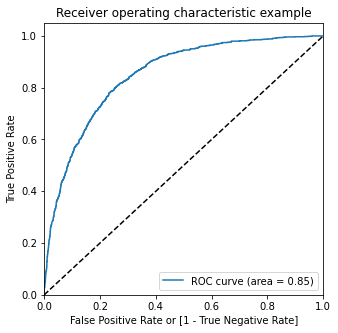

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_probability)

Text(0.5, 1.0, 'Reciever Operating Characterstic')

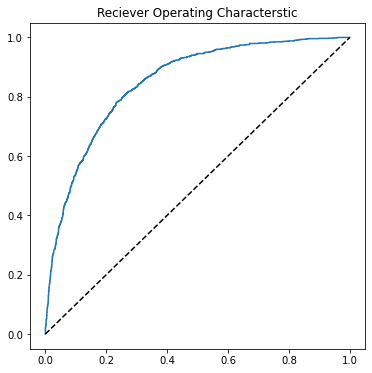

In [120]:
#plotting a reciever operating charactersticc curve without a function
plt.rcParams["figure.figsize"]= (6,6)
fpr, tpr, threshold= metrics.roc_curve(y_train_pred_final["Churn"], y_train_pred_final["Churn_probability"])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Reciever Operating Characterstic")

### ROC curve
The 
45 degree
 Diagonal

For a completely random model, the ROC curve will pass through the 45-degree line that has been shown in the graph above and in the best case it passes through the upper left corner of the graph. So the least area that an ROC curve can have is 0.5, and the highest area it can have is 1.

 

The Sensitivity vs Specificity Trade-off

As you saw in the last segment as well, the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 

 

Area Under the Curve

By determining the area under the curve (AUC) of an ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model which is something you saw in the last segment as well.

 

## Finding the optimal cut-off

In [121]:
numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Churn_probability"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()
    
    

,Churn,Churn_probability,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.201921,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.319135,5790,1,1,1,1,1,0,0,0,0,0,0
6498,1,0.704848,6498,1,1,1,1,1,1,1,1,1,0,0
880,1,0.607457,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.668245,2784,1,1,1,1,1,1,1,1,0,0,0


In [122]:
#creating dataframe for different cutoff and metrics

cutoff_df= pd.DataFrame(columns=["prob", "accuracy", "sensitivity", "specificity"])

num= [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1= metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy= (cm1[0,0]+ cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.261479     1.000000     0.000000
0.1   0.1  0.617432     0.944833     0.501513
0.2   0.2  0.721658     0.860917     0.672352
0.3   0.3  0.772044     0.766900     0.773865
0.4   0.4  0.796018     0.651127     0.847318
0.5   0.5  0.806380     0.540793     0.900413
0.6   0.6  0.799878     0.386946     0.946080
0.7   0.7  0.780577     0.210567     0.982393
0.8   0.8  0.748883     0.049728     0.996424
0.9   0.9  0.738521     0.000000     1.000000


<AxesSubplot:xlabel='prob'>

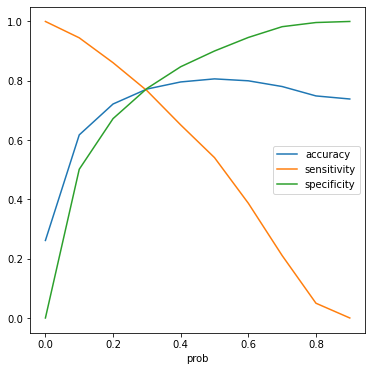

In [123]:
cutoff_df.plot.line( x="prob", y=["accuracy", "sensitivity", "specificity" ])

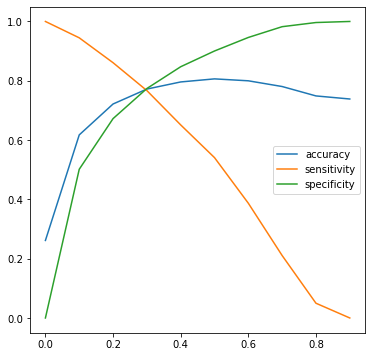

In [124]:
plt.plot(cutoff_df["prob"], cutoff_df["accuracy"], label= "accuracy")
plt.plot(cutoff_df["prob"], cutoff_df["sensitivity"], label= "sensitivity")
plt.plot(cutoff_df["prob"], cutoff_df["specificity"], label= "specificity")
plt.legend()
plt.show()

In [125]:
y_train_pred_final.head()

,Churn,Churn_probability,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.201921,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.319135,5790,1,1,1,1,1,0,0,0,0,0,0
6498,1,0.704848,6498,1,1,1,1,1,1,1,1,1,0,0
880,1,0.607457,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.668245,2784,1,1,1,1,1,1,1,1,0,0,0


In [126]:
y_train_pred_final["predi0.3"]= y_train_pred_final["Churn_probability"].map(lambda x: 1 if x>0.3 else 0)

In [127]:
y_train_pred_final.head()

,Churn,Churn_probability,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predi0.3
879,0,0.201921,879,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,0.319135,5790,1,1,1,1,1,0,0,0,0,0,0,1
6498,1,0.704848,6498,1,1,1,1,1,1,1,1,1,0,0,1
880,1,0.607457,880,1,1,1,1,1,1,1,1,0,0,0,1
2784,1,0.668245,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [128]:
metrics.accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predi0.3"])

0.7720438845997561

In [129]:
confusion03=metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predi0.3"]) 

In [130]:
confusion03

array([[2813,  822],
       [ 300,  987]], dtype=int64)

### Precision and Recall

In [131]:
precision= confusion[1,1]/(confusion[1,1]+ confusion[0,1])
precision

0.5456053067993366

In [132]:
recall= confusion[1,1]/ (confusion[1,1]+confusion[1,0])
recall

0.7668997668997669

In [133]:
precision3= confusion03[1,1]/(confusion03[1,1]+ confusion03[0,1])
precision3

0.5456053067993366

In [134]:
recall03= confusion03[1,1]/(confusion03[1,1]+ confusion03[1,0])
recall03

0.7668997668997669

### Using recall score and precision score builtin methods

In [135]:
precision_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.5456053067993366

In [136]:
recall_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.7668997668997669

###  Precision Recall Tradeoff

In [137]:
p,r,threshold= precision_recall_curve(y_train_pred_final["Churn"], y_train_pred_final["predicted"])


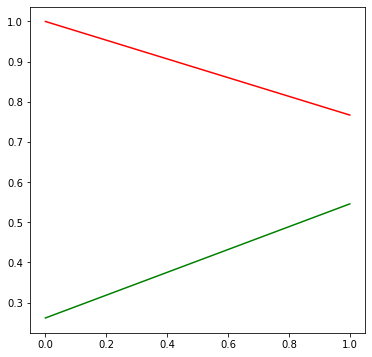

In [138]:
plt.plot(threshold, r[:-1], "red")
plt.plot(threshold, p[:-1], "green")

##  Making Predictions

In [139]:
X_test.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,PaymentMethod_Mailed check,gender_Male,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_No phone service,MultipleLines_Yes
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,...,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,0.439417,0.901896,0.596209,0.462750,0.163507,0.486730,0.301422,0.196209,0.240758,0.210427,...,0.218957,0.507109,0.289573,0.329858,0.346919,0.272986,0.389100,0.389573,0.098104,0.423697
std,0.347103,0.297526,0.490773,0.299717,0.369915,0.499942,0.458984,0.397222,0.427645,0.407708,...,0.413638,0.500068,0.453672,0.470273,0.476103,0.445599,0.487662,0.487769,0.297526,0.494261
min,0.000000,0.000000,0.000000,0.004975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098592,1.000000,0.000000,0.170647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.394366,1.000000,1.000000,0.520149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760563,1.000000,1.000000,0.712438,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.999005,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
X_test_sm= sm.add_constant(X_test)

In [141]:
X_train_sm_new.columns

Index(['const', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'MultipleLines_No phone service'],
      dtype='object')

In [142]:
X_test_sm.shape

(2110, 22)

In [143]:
X_test_sm.columns

Index(['const', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes'],
      dtype='object')

In [144]:
X_train_sm_new.shape

(4922, 15)

In [145]:
X_train_sm_new.columns

Index(['const', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'MultipleLines_No phone service'],
      dtype='object')

In [146]:
X_test_sm_new= X_test_sm[['const', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'MultipleLines_No phone service']]

In [147]:
y_test_pred=log_model3.predict(X_test_sm_new)

In [148]:
y_test_pred.head()

942     0.449299
3730    0.295104
1761    0.010613
2283    0.599738
1872    0.013457
dtype: float64

In [149]:
y_pred_1= pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
942,0.449299
3730,0.295104
1761,0.010613
2283,0.599738
1872,0.013457


In [150]:
y_test_df= pd.DataFrame(y_test)

In [151]:
y_test_df

,Churn
942,0
3730,1
1761,0
2283,1
1872,0
...,...
1289,0
3508,0
6765,0
3598,0


In [152]:
y_pred_final= pd.concat([y_test_df, y_pred_1], axis=1)

In [153]:
y_pred_final.head()

,Churn,0
942,0,0.449299
3730,1,0.295104
1761,0,0.010613
2283,1,0.599738
1872,0,0.013457


In [154]:
y_pred_final= y_pred_final.rename(columns= {0: "Churn_probability"})

In [155]:
y_pred_final.head()

,Churn,Churn_probability
942,0,0.449299
3730,1,0.295104
1761,0,0.010613
2283,1,0.599738
1872,0,0.013457


In [156]:
y_pred_final["predicted"]= y_pred_final["Churn_probability"].map(lambda x: 1 if x>0.3 else 0)

In [157]:
y_pred_final.head()

,Churn,Churn_probability,predicted
942,0,0.449299,1
3730,1,0.295104,0
1761,0,0.010613,0
2283,1,0.599738,1
1872,0,0.013457,0


In [158]:
metrics.accuracy_score(y_pred_final["Churn"], y_pred_final["predicted"])

0.7545023696682465

In [159]:
confusion_test= metrics.confusion_matrix(y_pred_final["Churn"], y_pred_final["predicted"])

In [160]:
confusion_test

array([[1167,  361],
       [ 157,  425]], dtype=int64)

In [161]:
TP=confusion_test[1,1]
TN= confusion_test[0,0]
FP= confusion_test[0,1]
FN= confusion_test[1,0]

In [162]:
#senstivity
TP/(TP+FN)

0.7302405498281787

In [163]:
#specificity
TN/(TN+FP)

0.7637434554973822

In [164]:
359/(359+223)

0.6168384879725086